In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
from tqdm import tqdm

In [2]:
plt.rcParams.update({'font.size': 15})

In [3]:
filepath = r"C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\MoonAnalysis\samples"
with open(os.path.join(filepath,'run1_minuit_ArgsErrors.pkl'),'rb') as file:
    M = pickle.load(file)

arr = np.load(os.path.join(filepath,'run1_RecoSigma_N393K.npy'))

In [4]:
arr, M

(array([[ -9.70907239, -11.51647752,   2.09646386],
        [-16.2877784 ,   5.0452761 ,   2.26190127],
        [ -2.23472555,  -2.92543041,   2.26952654],
        ...,
        [-10.68094082,   6.87969587,   2.46466191],
        [  3.19622025,   1.70112561,   2.36013458],
        [-13.89817783,  -1.83021077,   2.34388128]]),
 [{'mu_x': 0.889705190851843,
   'mu_y': 0.7253221842928053,
   'sigma': 0.4752671200232963,
   'f': 0.9999999907718966},
  {'mu_x': 0.7208468302924289,
   'mu_y': 0.6871658559359588,
   'sigma': 0.13984467148045443,
   'f': 0.999704889975459}])

In [30]:
vals, binex, biney = np.histogram2d(arr[:,0],arr[:,1],bins=20,range=((-5,5),(-5,5)))

In [31]:
def binc(binedges):
    return 0.5*(binedges[1:] + binedges[:-1]), (binedges[1:] - binedges[:-1]).mean()

bincx, dx = binc(binex)
bincy, dy = binc(biney)
X,Y = np.meshgrid(bincx,bincy)

In [32]:
h = np.zeros((bincx.shape[0],bincy.shape[0]))
for row, x in enumerate(tqdm(bincx)):
    for col, y in enumerate(bincy):
        r = ((arr[:,0] - x)**2 + (arr[:,1] - y)**2)
#         w = (1+r/dx**2)**(-2)#np.exp(-2/d*r)
        w = np.exp(-(r/(2*(dx**2+dy**2)))**2)
        h[row,col] = w.mean()#(w*df.solidA).sum()/w.sum()

100%|██████████████████████████████████████████| 20/20 [00:13<00:00,  1.50it/s]


<IPython.core.display.Javascript object>


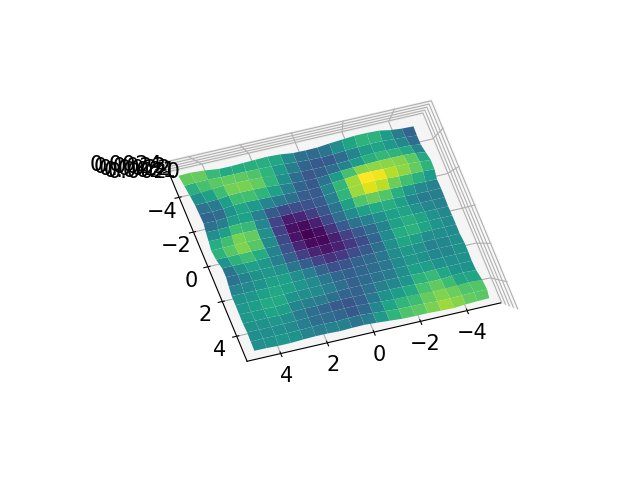

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.bar3d(X.flatten(),Y.flatten(),np.zeros(X.flatten().shape[0]),dx,dy,vals.flatten())
ax.plot_surface(X,Y,h,cmap='viridis')

In [34]:
h2 = np.zeros((bincx.shape[0],bincy.shape[0]))
for row, x in enumerate(tqdm(bincx)):
    for col, y in enumerate(bincy):
        r = ((arr[:,0] - x)**2 + (arr[:,1] - y)**2)
#         w = (1+r/dx**2)**(-2)#np.exp(-2/d*r)
        w = np.exp(-(r/(2*(arr[:,2])))**2)
        h2[row,col] = w.mean()#(w*df.solidA).sum()/w.sum()

100%|██████████████████████████████████████████| 20/20 [00:13<00:00,  1.44it/s]


<IPython.core.display.Javascript object>


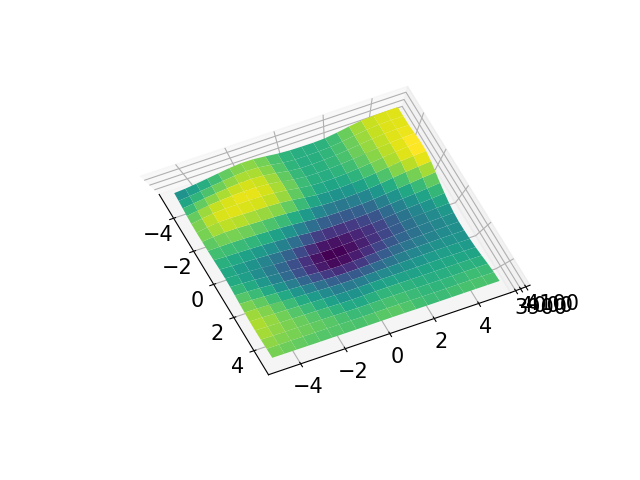

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.bar3d(X.flatten(),Y.flatten(),np.zeros(X.flatten().shape[0]),dx,dy,vals.flatten())
ax.plot_surface(X,Y,h2*arr.shape[0],cmap='viridis')